(np.float64(-0.5), np.float64(153.5), np.float64(83.5), np.float64(-0.5))

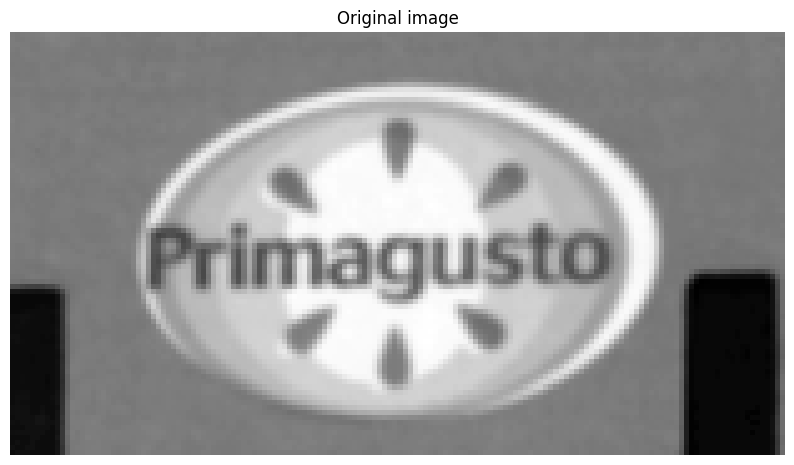

In [97]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)


# We load the camera calibration results (We took the photos with the first camera setup)
cameraParameters = np.load(baseFolder + "/calibration/camera_setup1.npz")

# We extract the camera matrix and distortion coefficients, through the keys in the dictionary
mtx = cameraParameters['mtx']
dist = cameraParameters['dist']
res = cameraParameters['res']


# We find the dimensions of the image
h, w = img.shape[:2]

# We find the new camera matrix and interested region
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# We undistort the image
udst_img = cv.undistort(img, mtx, dist, None, newcameramtx)

# We crop the image using the ROI
x_r, y_r, w_r, h_r = roi
udst_crop_img = udst_img[y_r:y_r+h_r, x_r:x_r+w_r]



# The images are shown
plt.figure(figsize=(10, 14))
plt.imshow(udst_crop_img, cmap='grey')
plt.title("Original image")
plt.axis("off")



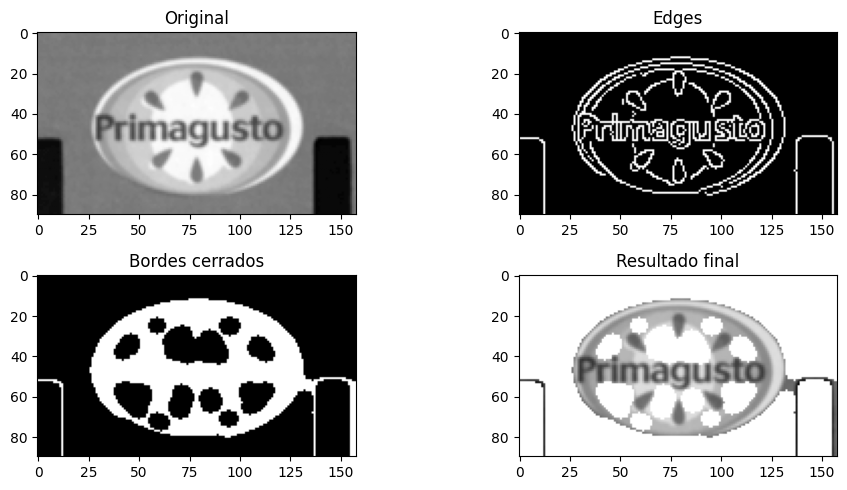

In [98]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Aplicar Canny para detectar bordes
edges = cv2.Canny(img, 40, 100)

# 3. Cerrar bordes para que formen una elipse cerrada
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 4. Rellenar los bordes cerrados para crear una máscara
# Invertimos la imagen para encontrar región interna
inv = cv2.bitwise_not(closed_edges)
_, thresh = cv2.threshold(inv, 254, 255, cv2.THRESH_BINARY)

# Rellenar usando flood fill desde un punto exterior
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
flooded = thresh.copy()
cv2.floodFill(flooded, mask, (0, 0), 255)
flooded_inv = cv2.bitwise_not(flooded)

# 5. Crear máscara final (solo la región del óvalo oscuro)
final_mask = flooded_inv

# 6. Aplicar máscara: todo fuera del óvalo se pone blanco
result = img.copy()
result[final_mask == 0] = 255

# 7. Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.subplot(2, 2, 3)
plt.imshow(closed_edges, cmap='gray')
plt.title("Bordes cerrados")
plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title("Resultado final")
plt.tight_layout()
plt.show()


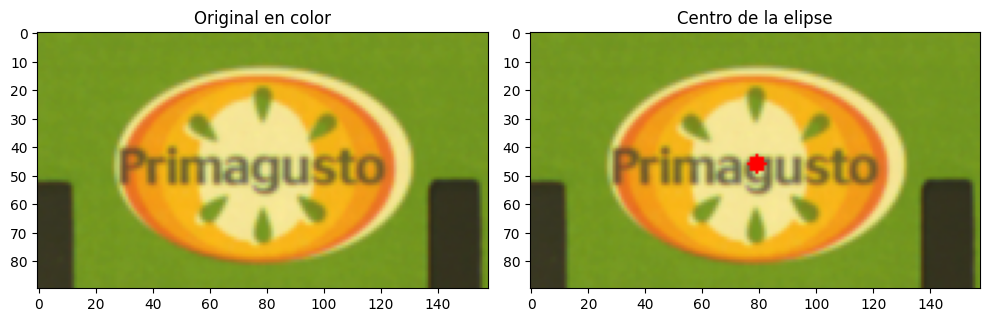

In [99]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# Cargar imagen
baseFolder = os.getcwd()
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Imagen en color y en gris
img_color = cv.imread(os.path.join(folder, "15.png"))
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# 1. Bordes con Canny
edges = cv.Canny(img_gray, 40, 100)

# 2. Cierre morfológico
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
closed_edges = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

# 3. Invertir y umbralizar
inv = cv.bitwise_not(closed_edges)
_, thresh = cv.threshold(inv, 254, 255, cv.THRESH_BINARY)

# 4. Flood fill para rellenar región interior
h, w = img_gray.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
flooded = thresh.copy()
cv.floodFill(flooded, mask, (0, 0), 255)
flooded_inv = cv.bitwise_not(flooded)

# 5. Máscara final
final_mask = flooded_inv

# 6. Aplicar máscara
result = img_gray.copy()
result[final_mask == 0] = 255

# 7. Encontrar el mayor contorno de la elipse
contours, _ = cv.findContours(final_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv.contourArea)

# 8. Calcular centroide del contorno mayor
M = cv.moments(max_contour)
if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
else:
    cx, cy = 0, 0  # Evita división por cero

# 9. Dibujar círculo rojo en imagen color
output_img = img_color.copy()
cv.circle(output_img, (cx, cy), 3, (0, 0, 255), -1)

# 10. Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title("Original en color")
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.title("Centro de la elipse")
plt.tight_layout()
plt.show()


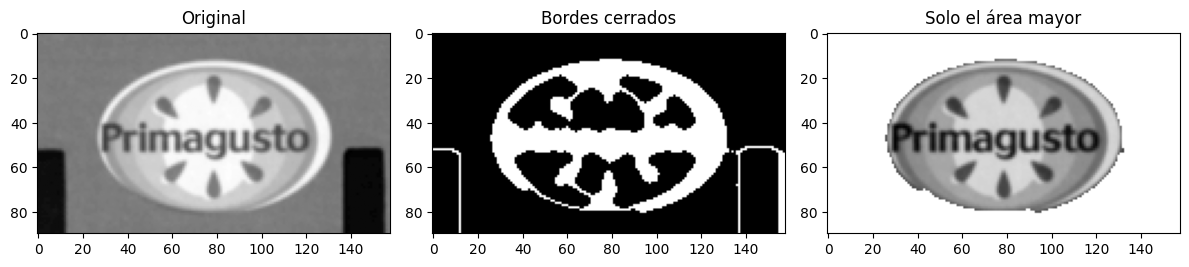

In [100]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Detectar bordes con Canny
edges = cv2.Canny(img, 50, 150)

# 3. Cerrar huecos para asegurar contornos cerrados
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 4. Encontrar todos los contornos
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Buscar el contorno con el área máxima
max_contour = max(contours, key=cv2.contourArea)

# 6. Crear máscara con solo ese contorno
mask = np.zeros_like(img)
cv2.drawContours(mask, [max_contour], -1, 255, thickness=cv2.FILLED)

# 7. Aplicar la máscara a la imagen original (lo que no está en la máscara se vuelve blanco)
result = img.copy()
result[mask == 0] = 255

# 8. Mostrar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(closed, cmap='gray')
plt.title("Bordes cerrados")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap='gray')
plt.title("Solo el área mayor")
plt.tight_layout()
plt.show()

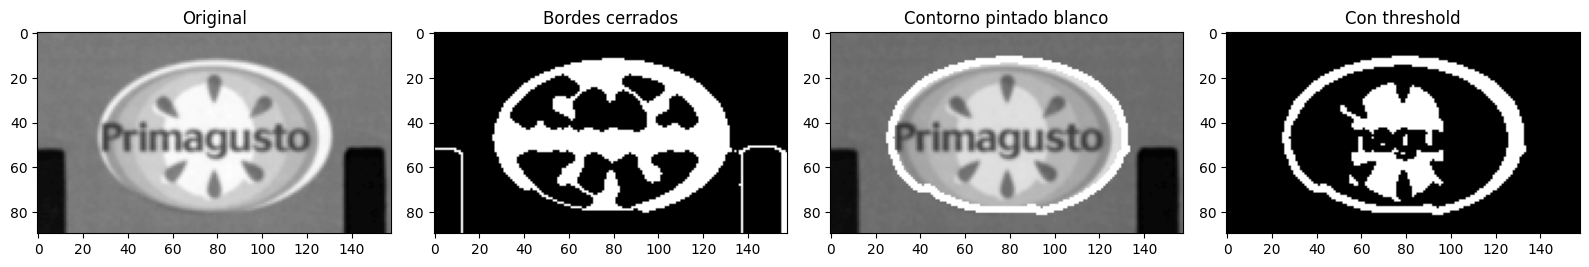

In [101]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Detectar bordes con Canny
edges = cv2.Canny(img, 50, 150)

# 3. Cerrar huecos para asegurar contornos cerrados
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 4. Encontrar todos los contornos
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Buscar el contorno con el área máxima
max_contour = max(contours, key=cv2.contourArea)

# 6. Crear máscara y dibujar solo el borde del contorno más grande
mask = np.zeros_like(img)
cv2.drawContours(mask, [max_contour], -1, 255, thickness=2)  # Solo borde, no relleno

# 7. Pintar el borde en blanco en la imagen original
result = img.copy()
result[mask == 255] = 255  # Pintar el borde de blanco

# 8. Aplicar un umbral si deseas borrar el borde blanco (opcional)
_, thresholded = cv.threshold(result, 200, 255, cv.THRESH_BINARY)

#cv2.threshold(result, 254, 255, cv2.THRESH_BINARY_INV)  # Borrar borde blanco si es necesario

# 9. Mostrar resultados
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(1, 4, 2)
plt.imshow(closed, cmap='gray')
plt.title("Bordes cerrados")
plt.subplot(1, 4, 3)
plt.imshow(result, cmap='gray')
plt.title("Contorno pintado blanco")
plt.subplot(1, 4, 4)
plt.imshow(thresholded, cmap='gray')
plt.title("Con threshold")
plt.tight_layout()
plt.show()

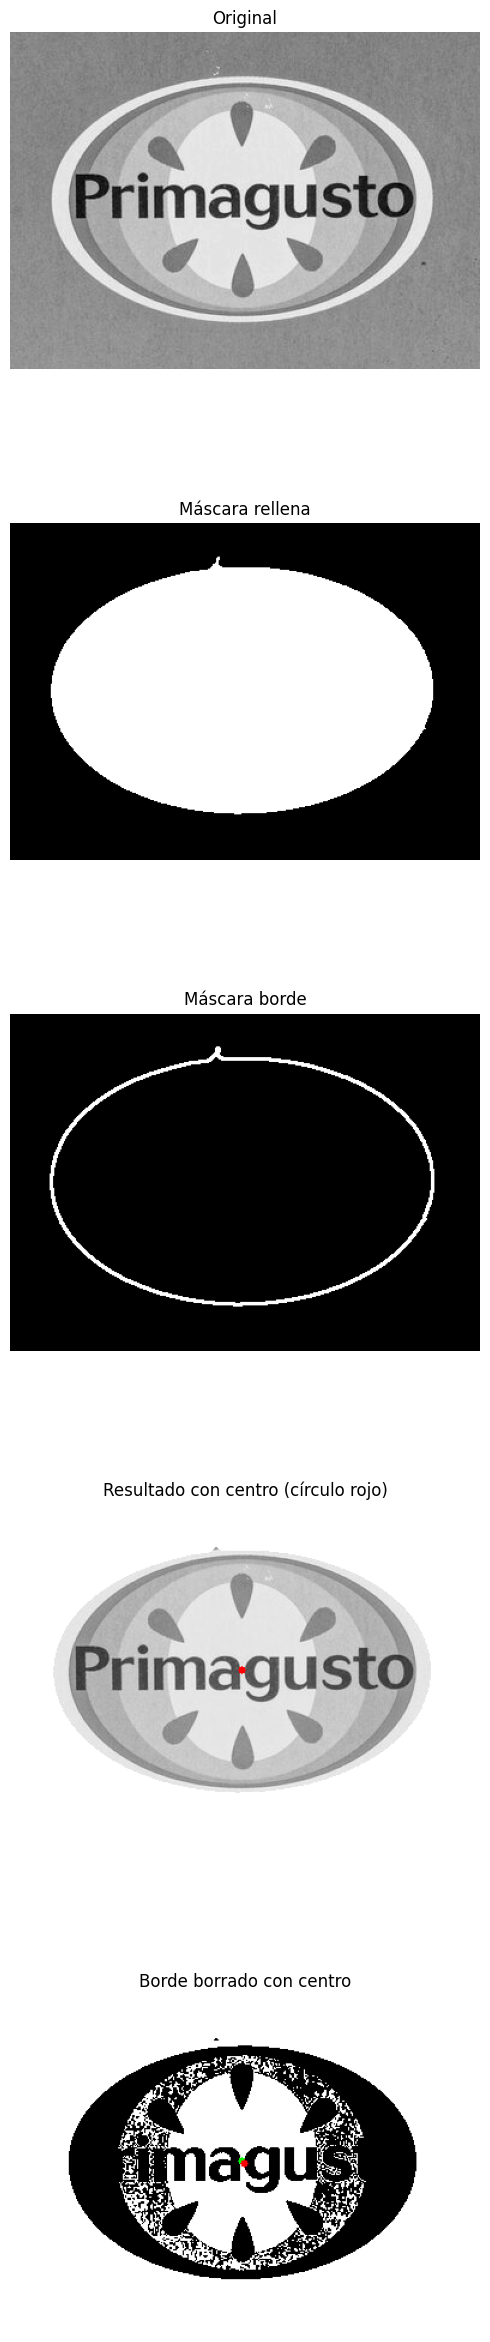

In [102]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

baseFolder = os.getcwd()
folder = os.path.join(baseFolder, "photos", "diffDefect")

img = cv.imread(os.path.join(folder, "logo_cropped.png"), 0)
#img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Detectar bordes con Canny
edges = cv.Canny(img, 50, 150)

# 3. Cerrar huecos para asegurar contornos cerrados
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
closed = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

# 4. Encontrar todos los contornos
contours, _ = cv.findContours(closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# 5. Buscar el contorno con el área máxima
max_contour = max(contours, key=cv.contourArea)

# 6. Crear máscara del contorno relleno (para conservar solo el interior)
filled_mask = np.zeros_like(img)
cv.drawContours(filled_mask, [max_contour], -1, 255, thickness=cv.FILLED)

# 7. Crear otra máscara solo con el borde (sin rellenar)
border_mask = np.zeros_like(img)
cv.drawContours(border_mask, [max_contour], -1, 255, thickness=2)

# 8. Crear la imagen resultado
result = img.copy()
result[border_mask == 255] = 255
result[filled_mask == 0] = 255

# 9. Aplicar un umbral (opcional)
_, thresholded = cv.threshold(result, 200, 255, cv.THRESH_BINARY)

# ======= NUEVO: Calcular y dibujar el centroide =========
M = cv.moments(max_contour)
if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    # Dibuja el centro en result y thresholded
    result_with_center = cv.cvtColor(result.copy(), cv.COLOR_GRAY2BGR)
    cv.circle(result_with_center, (cx, cy), 3, (0, 0, 255), -1)
else:
    result_with_center = result
    thresholded_with_center = thresholded

# Recalcular contorno en thresholded si ha cambiado la forma
contours_thr, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
max_contour_thr = max(contours_thr, key=cv.contourArea)

# Centroide nuevo para thresholded
M_thr = cv.moments(max_contour_thr)
if M_thr["m00"] != 0:
    cx_thr = int(M_thr["m10"] / M_thr["m00"])
    cy_thr = int(M_thr["m01"] / M_thr["m00"])
    thresholded_with_center = cv.cvtColor(thresholded.copy(), cv.COLOR_GRAY2BGR)
    cv.circle(thresholded_with_center, (cx, cy), 3, (0, 255, 0), -1)
    cv.circle(thresholded_with_center, (cx_thr, cy_thr), 3, (0, 0, 255), -1)
    

# 10. Mostrar resultados
plt.figure(figsize=(5, 25))

plt.subplot(5, 1, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(5, 1, 2)
plt.imshow(filled_mask, cmap='gray')
plt.title("Máscara rellena")
plt.axis("off")

plt.subplot(5, 1, 3)
plt.imshow(border_mask, cmap='gray')
plt.title("Máscara borde")
plt.axis("off")

plt.subplot(5, 1, 4)
plt.imshow(cv.cvtColor(result_with_center, cv.COLOR_BGR2RGB))
plt.title("Resultado con centro (círculo rojo)")
plt.axis("off")

plt.subplot(5, 1, 5)
plt.imshow(cv.cvtColor(thresholded_with_center, cv.COLOR_BGR2RGB))
plt.title("Borde borrado con centro")
plt.axis("off")

plt.tight_layout()
plt.show()


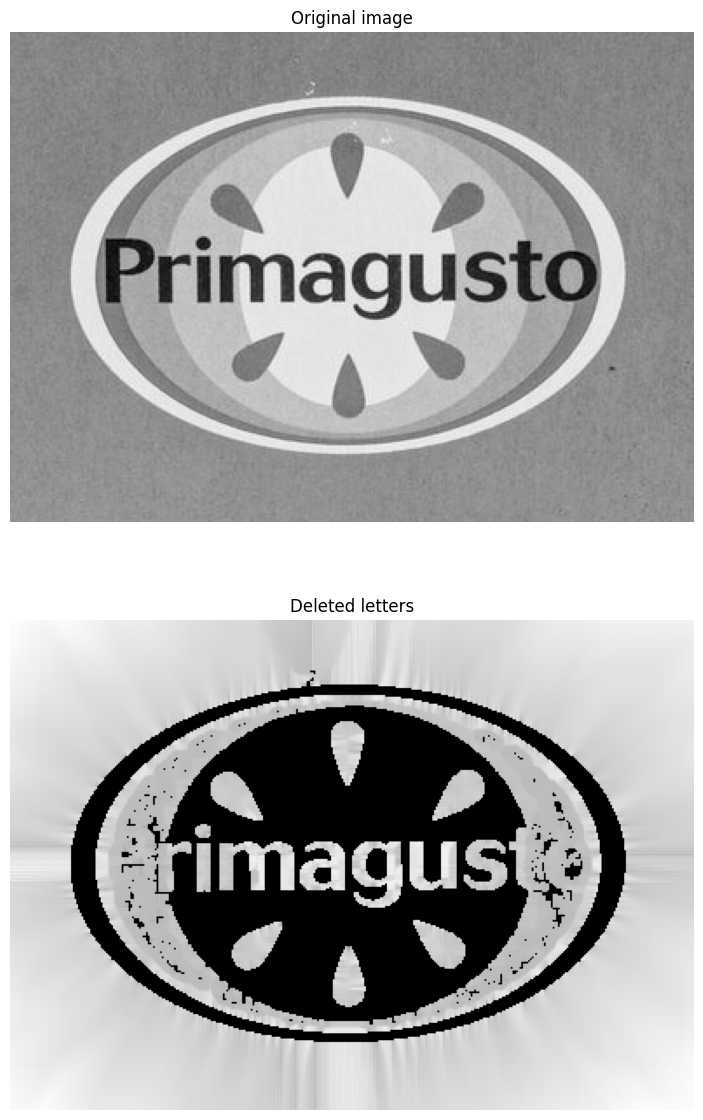

In [103]:
# We do a inverse binary thresholding to get the letters in white, using optimal threshold (OTSU)
_, bin_text = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# We create a kernel to remove the letters
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
mask_letters = cv.morphologyEx(bin_text, cv.MORPH_OPEN, kernel, iterations=1)

# We use inpainting to fill the letters with the background
img_inpaint = cv.inpaint(img, mask_letters, inpaintRadius=1, flags=cv.INPAINT_TELEA)
img_inpaint = cv.bitwise_and(img_inpaint, img_inpaint, mask=mask_letters)

# The images are shown
plt.figure(figsize=(10, 14))
plt.subplot(2,1,1)
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.axis("off")

plt.subplot(2,1,2)
plt.imshow(img_inpaint, cmap='gray')
plt.title("Deleted letters")
plt.axis("off")
plt.show()

In [104]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

# Opcional: aplicar umbral o técnicas de mejora
_, umbral = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Extraer texto
texto = pytesseract.image_to_string(umbral, lang='ita')  # 'eng' para inglés, 'spa' para español

print("Texto detectado:")
print(texto)

Texto detectado:



In [105]:
# Aplicar umbral adaptativo para mejorar el contraste
thresh = cv2.adaptiveThreshold(img, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 15, 3)

# Opcional: aplicar dilatación para conectar caracteres rotos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
processed = cv2.dilate(thresh, kernel, iterations=1)

# Configurar Tesseract (puedes ajustar 'psm' para distintos modos de reconocimiento)
custom_config = r'--oem 3 --psm 6'

# Ejecutar OCR
text = pytesseract.image_to_string(processed, config=custom_config, lang='ita')

print("Texto detectado:", text)

Texto detectado: ‘ {Primagusto )
i e ia ET



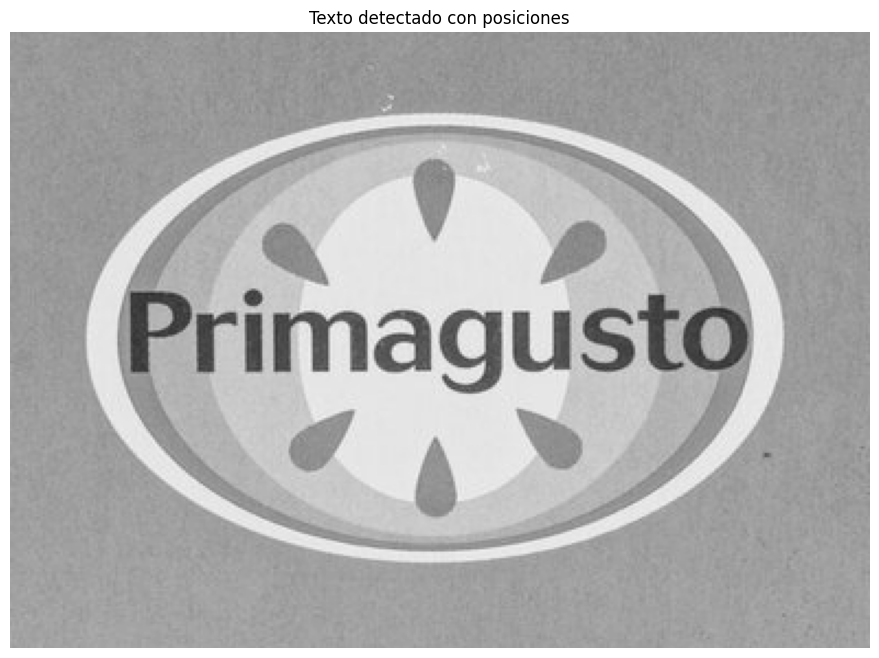

In [106]:
thresh = cv.adaptiveThreshold(img, 255,
                               cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv.THRESH_BINARY_INV, 15, 3)

# Dilatación para mejorar detección de caracteres
kernel = cv.getStructuringElement(cv.MORPH_RECT, (1, 1))
processed = cv.dilate(thresh, kernel, iterations=1)

# Configuración personalizada de Tesseract
custom_config = r'--oem 3 --psm 6'
data = pytesseract.image_to_data(processed, config=custom_config, output_type=pytesseract.Output.DICT)

# Dibujar rectángulos y centros sobre la imagen original (no en escala de grises)
for i in range(len(data['text'])):
    texto = data['text'][i]
    conf = int(data['conf'][i])
    
    if conf > 60 and texto.strip() != "":
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cx, cy = x + w // 2, y + h // 2

        # Dibujar rectángulo verde
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Dibujar punto rojo en el centro
        cv.circle(img, (cx, cy), 3, (0, 0, 255), -1)
        # Mostrar texto encima del rectángulo
        #cv.putText(img, texto, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Convertir BGR a RGB para mostrar con matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mostrar imagen con matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.title("Texto detectado con posiciones")
plt.axis('off')
plt.show()

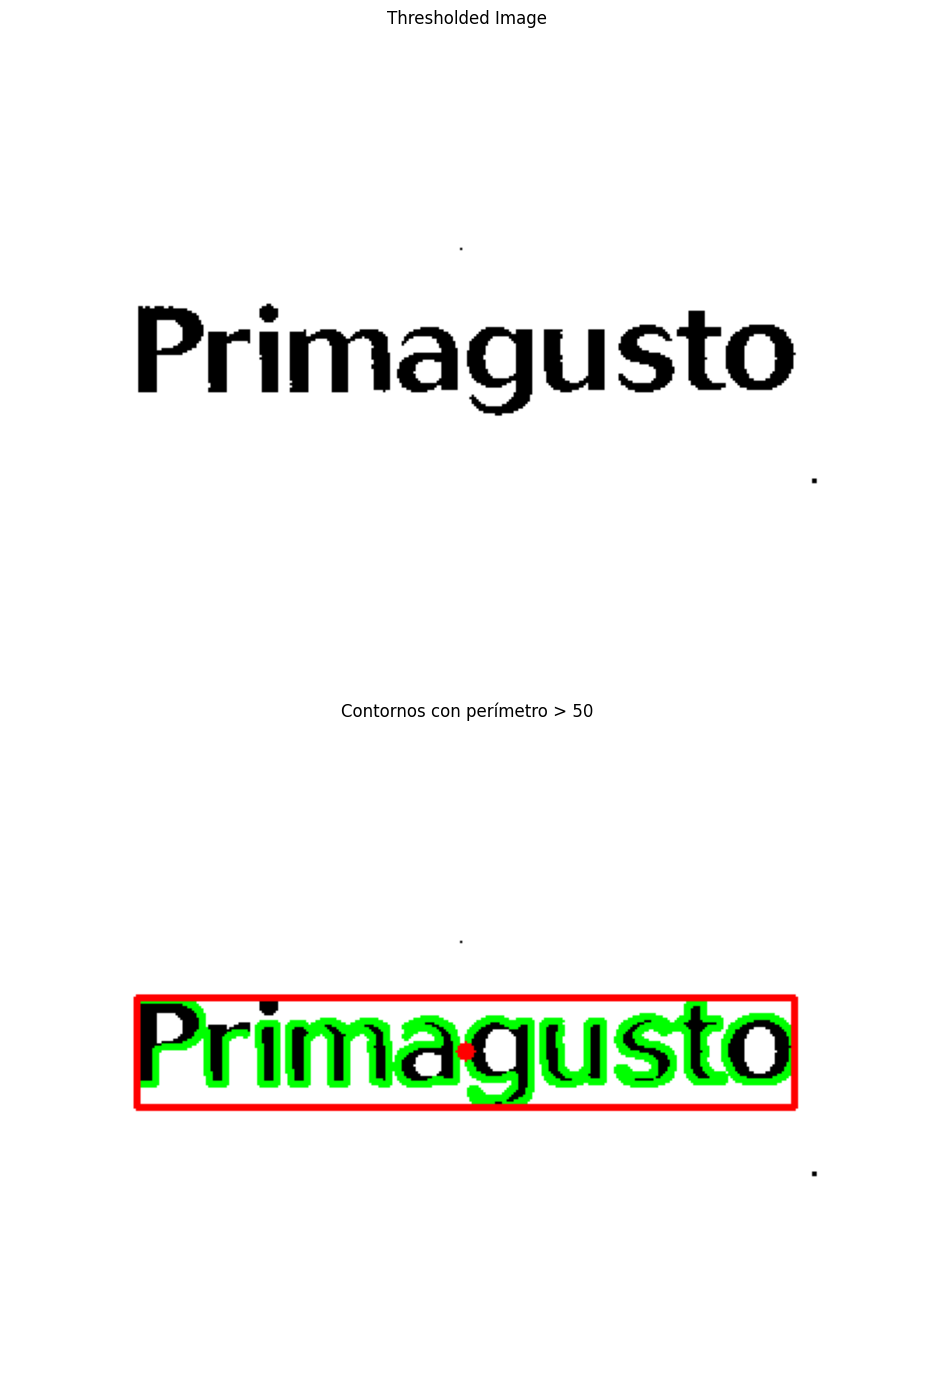

In [107]:
# Umbral binario
_, threshold_def = cv.threshold(img, 120, 255, cv.THRESH_BINARY)

# Canny para detección de bordes
low_thresh  = 50
high_thresh = 150
edges_masked = cv.Canny(threshold_def, low_thresh, high_thresh, apertureSize=3)

# Encontrar contornos
contours_masked, _ = cv.findContours(edges_masked, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Imagen donde se dibujarán los contornos (color)
contour_vis = cv.cvtColor(threshold_def, cv.COLOR_GRAY2BGR)

# Umbral de perímetro mínimo
perimetro_minimo = 50  # Puedes ajustar este valor

rect_x_izq = 10000
rect_x_der = 0
rect_y_up = 10000
rect_y_down = 0

# Dibujar solo contornos que superen ese perímetro
for contorno in contours_masked:
    perimetro = cv.arcLength(contorno, True)
    if perimetro > perimetro_minimo:

        # Extraer coordenadas (forma Nx1x2 → Nx2)
        puntos = contorno[:, 0, :]

        cv.drawContours(contour_vis, [contorno], -1, (0, 255, 0), 2)

        # Coordenadas extremas
        x_izq = puntos[:, 0].min()
        x_der = puntos[:, 0].max()
        y_arriba = puntos[:, 1].min()
        y_abajo = puntos[:, 1].max()

        # Actrualizamos el rectangulo delimitador
        if x_izq < rect_x_izq:
            rect_x_izq = x_izq
        
        if x_der > rect_x_der:
            rect_x_der = x_der

        if y_arriba < rect_y_up:
            rect_y_up = y_arriba

        if y_abajo > rect_y_down:
            rect_y_down = y_abajo

# Dibujamos el rectangulo
cv.rectangle(contour_vis, (rect_x_izq, rect_y_up), (rect_x_der, rect_y_down), (0, 0, 255), 2)

cv.circle(contour_vis, ((rect_x_izq + rect_x_der) // 2, (rect_y_up + rect_y_down) // 2), 4, (0, 0, 255), -1)

# Mostrar los resultados con Matplotlib
plt.figure(figsize=(10, 14))

plt.subplot(2, 1, 1)
plt.imshow(threshold_def, cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(cv.cvtColor(contour_vis, cv.COLOR_BGR2RGB))
plt.title("Contornos con perímetro > {}".format(perimetro_minimo))
plt.axis("off")

plt.tight_layout()
plt.show()


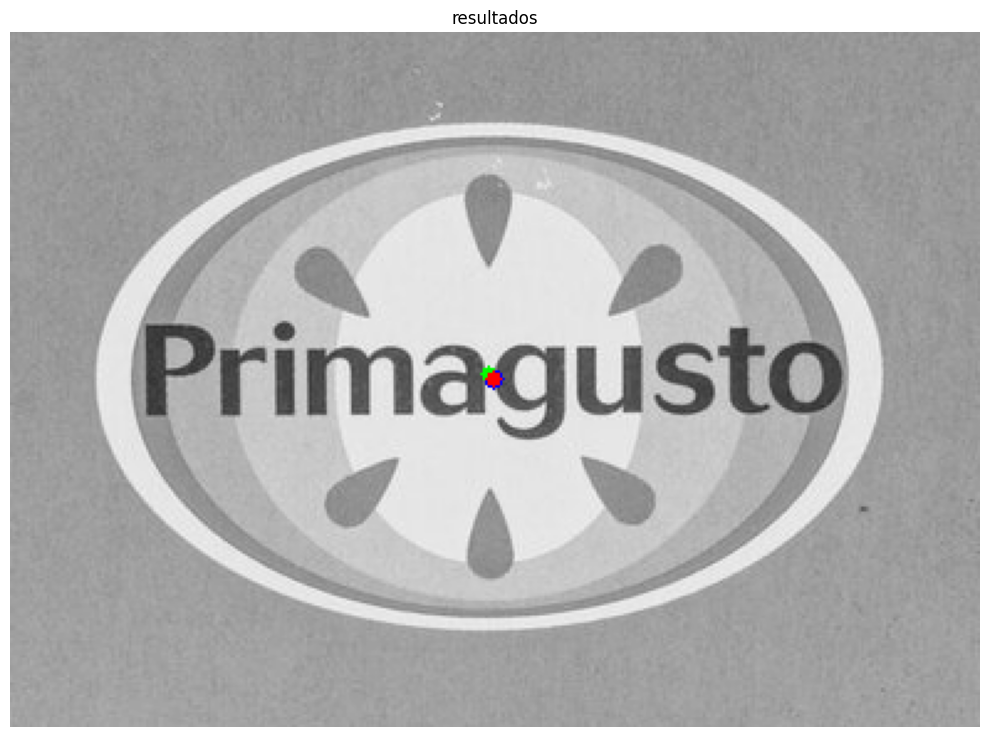

In [110]:
# Imagen donde se dibujarán los contornos (color)
results = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

cv.circle(results, ((rect_x_izq + rect_x_der) // 2, (rect_y_up + rect_y_down) // 2), 4, (255, 0, 0), -1)
cv.circle(results, (cx, cy), 3, (0, 255, 0), -1)
cv.circle(results, (cx_thr, cy_thr), 3, (0, 0, 255), -1)


plt.figure(figsize=(10, 14))
plt.imshow(cv.cvtColor(results, cv.COLOR_BGR2RGB))
plt.title("resultados")
plt.axis("off")

plt.tight_layout()
plt.show()


In [108]:
# Aumentar tamaño (escalar la imagen)
scale_percent = 400  # Escalar al 400%
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
resized = cv.resize(image, (width, height), interpolation=cv.INTER_CUBIC)

# Convertir a escala de grises
gray = cv.cvtColor(resized, cv.COLOR_BGR2GRAY)

# Aumentar contraste con CLAHE (mejora de histograma)
clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
gray = clahe.apply(gray)

# Aplicar un filtro para reducir el desenfoque (opcional y delicado)
sharpen_kernel = cv.getStructuringElement(cv.MORPH_RECT, (1, 1))
gray = cv.filter2D(gray, -1, sharpen_kernel)

# Umbral adaptativo para binarizar
thresh = cv.adaptiveThreshold(gray, 255, 
                               cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv.THRESH_BINARY, 11, 2)

# OCR con configuración ajustada
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(thresh, config=custom_config)

print("Texto detectado:", text)

Texto detectado: FEED Mie DCEO TOS FUE OTN BERT he
SCA Pee a SRL ONE Bae ted
amare een eg eee) a8 F
se ee rima u GC Perens,
cep iyi’ BGS Ny yet
EP eT ag I al te od Poy
eer ee we OO 3od PS.

ori eae ei eG Be Se
Pe AL ERE ep Bh Ohne Ee yt gt wee eM Mlb Tagg RSS * Be



In [109]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# ------------------------------------------
# Paso 1: Aplicar la máscara para aislar solo el óvalo
isolated = cv.bitwise_and(img, img, mask=final_mask)

# Paso 2: Umbral inverso para resaltar las letras oscuras
_, binary_letters = cv.threshold(isolated, 100, 255, cv.THRESH_BINARY_INV)

# Paso 3: Morfología para limpiar letras
kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
cleaned_letters = cv.morphologyEx(binary_letters, cv.MORPH_OPEN, kernel)

# Paso 4: Encontrar contornos
contours, _ = cv.findContours(cleaned_letters, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Paso 5: Filtrar por área y aspecto para aislar letras
letter_boxes = []
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    area = cv.contourArea(cnt)
    aspect = w / float(h)
    if 20 < area < 1000 and 0.2 < aspect < 2.5:
        letter_boxes.append((x, y, w, h))

# Paso 6: Dibujar bounding box general si se detectan letras
output_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
if letter_boxes:
    x_min = min([x for x, y, w, h in letter_boxes])
    y_min = min([y for x, y, w, h in letter_boxes])
    x_max = max([x + w for x, y, w, h in letter_boxes])
    y_max = max([y + h for x, y, w, h in letter_boxes])

    cv.rectangle(output_img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
else:
    print("No se detectaron letras")

# Mostrar resultado
plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.title("Texto 'Primagusto' detectado y encerrado")
plt.axis("off")
plt.show()



error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'
